<h1 align=right><font size = 2>Author: ivanjdevs</font></h1>

<h1 align=center><font size = 6>Data Wrangling</font></h1>

<h3> ¿Qué es esa vuelta del data wrangling? </h3>

Data wrangling es el proceso de convertir los datos, mediante una serie de pasos, de un formato a otro que se considera mejor para su análisis.

<h4> ¿Cuáles son esos pasos?</h4>

<h5> Pueden haber diferentes enfoques, pero en general los pasos principales son los siguientes:</h5>

<ul>
    
<li>Identificar y manejar valores faltantes (Identify and handle missing values)</li>
<li>Corregir el formato de los datos (Data formatting)</li>
<li>Normalización de los datos: centrado/escalado (Data normalization: centering/scaling)</li>
<li>Discretización (Binning)</li>


<ul>

<h5> Let's take a dataset and run it through the steps above.</h5>

In [143]:
# Importar la librería pandas que nos ofrece un casi ilimitado número de herramientas para manejar datasets y numpy para temas de arrays  op. numéricas.
import pandas as pd
import numpy as np

##### El achivo que se va a trabajar esta en la web. Viene en formato csv (Comma separated value)

In [144]:
## Guardando la url donde está contenido el archivo que en una variable
loc="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/auto.csv"

In [145]:
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]

In [146]:
##Cargando el dataset en una variable (puede darle a la variable el nombre que se le de la gana)
dcars = pd.read_csv(loc, names = headers)

In [147]:
dcars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


##### En caso haya habido error al tratar de descargar el dataset, el archivo auto.csv se proporciona en conjunto con este notebook; ejecutar el el código del siguiente snippet quitando el comentario (los #) a las líneas de código. Si está corriendo este notebook en su máquina local, asegúrese de que el archivo auto.csv y el notebook están dentro de la misma carpeta.

In [110]:
#dt=pd.read_csv('auto.csv')
#dt.head()

##### Primero, obtener una idea general de nuestro dataset, es decir, cuantas filas y columnas tiene e información sobre los tipos de datos que almacena cada columna.

In [148]:
##Número de filas y columnas
dcars.shape

(205, 26)

In [149]:
## Tipos de datos de cada columa
dcars.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

<h3> ------------------------------------------------------------1.1 Identificar los valores faltantes------------------------------------------------------------ </h3>

#### Pero, ¿que se consideran valores nulos? Pues registros donde aparece la sigla NaN (not a number)

In [150]:
## Una primera aproximación es usando el método info, que presenta, además del tipo de dato de cada columna, la cantidad de valores no nulos en cada una de ellas.
dcars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

Del método shape se vio que se tiene 205 registros (filas o rows). El método .info() nos presenta cuantos valores no nulos hay en cada columna. 

##### Según el resultado anterior, no hay valores nulos en las columnas, pero OJO!!, eso no quiere decir que no existan valores no válidos. En el dataset que hemos traido, los datos faltantes aparecen con signo "?" como se ve en las tres primeras filas de la columna "normalized-losses"

##### Reemplacemos de una vez esos "?" por NaN, el cual es el marcador por defecto de Python para valores faltantes por razones de conveniencia y velocidad de computo.

In [151]:
dcars.replace("?", np.nan, inplace = True)
dcars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [152]:
### Esta línea de abajo si funciona, solo que hay que hacer una función for para esto
#carac=['?', '#']
#dfcarac=dcars[dcars['bore'].isin(carac)]
#dfcarac

##### Vamos a hacer un ejemplo con un dataframe pequeño donde podemos aplicar identificación y conteo de valores nulos.

In [153]:
#El propósito de este notebook es presentar que es el Data wrangling. A continuación creamos un dataframe, luego sobre la crear dataframes no se hace explicación aca. 

dict = {'First Score':[100, 90, np.nan, 95, 80, 88, np.nan],
        'Second Score': [np.nan, 45, 56, np.nan, 60, 48, np.nan],
        'Third Score':[np.nan, 85, 80, 91, np.nan, 75, 68]}
  
# creating a dataframe from dictionary
dfg = pd.DataFrame(dict)
dfg

,First Score,Second Score,Third Score
0,100.0,NaN,NaN
1,90.0,45.0,85.0
2,NaN,56.0,80.0
3,95.0,NaN,91.0
4,80.0,60.0,NaN
5,88.0,48.0,75.0
6,NaN,NaN,68.0


In [123]:
## Aplicando el método ya visto para obtener el tipo de dato en cada columna y si hay valores nulos en ellas
dfg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   First Score   5 non-null      float64
 1   Second Score  4 non-null      float64
 2   Third Score   5 non-null      float64
dtypes: float64(3)
memory usage: 296.0 bytes


Podemos comprobar fácilmente de manera visual que efectivamente en el dataframe dfg, en la columna 'First Score' hay 5 valores no nulos, en 'Second Score' hay 4 valores no nulos y en la tercera columna hay 5 valores no nulos.

#### El método isnull().sum() también es útil. En este caso, éste nos entrega cuántos valores nulos hay en cada columna. Lo maluco de esto es que, si el dataframe tiene muchas columnas, pues no me va a mostrar todas sino el resumen de las primeras y las últimas. En este caso. como apenas son 26 columnas, me las presenta toda.

In [154]:
dfg.isnull().sum()

First Score     2
Second Score    3
Third Score     2
dtype: int64

##### También puedo aplicar método isnull().sum() solo a alguna columna de interés.

In [155]:
dfg['First Score'].isnull().sum()

2

<h3 id="deal_missing_values">Bueno pero, ¿y como se manejan los valores faltantes?</h3>

<h3>1.2 Manejar los valores faltantes</h3>

<ol>
    <li>Validando con la fuente de los datos a ver si se puede obtener esa info faltante<br>
    <li>Eliminando datos<br>
        a. Eliminar toda la fila<br>
        b. Eliminar toda la columna
    </li>
    <li>Reemplazando datos<br>
        a. Reemplazarlos por la media<br>
        b. Reemplazarlos por el valor más común, método aplicado a variables categóricas<br>
        c. Reemplazarlos en base a otras funciones
    </li>
</ol>

<h5> El criterio a aplicar dependerá de diferentes factores. Habrá que evaluar si eliminar todas las filas con valores nulos elimina muchos datos y nos impacta el análisis final.</h4>
<h5> Apliquemos el método de eliminar todas las filas con valores nulos al dataframe dfg.</h4>

In [156]:
### Presentemos nuevamente nuestro dataframe dfg
dfg

,First Score,Second Score,Third Score
0,100.0,NaN,NaN
1,90.0,45.0,85.0
2,NaN,56.0,80.0
3,95.0,NaN,91.0
4,80.0,60.0,NaN
5,88.0,48.0,75.0
6,NaN,NaN,68.0


In [157]:
### Eliminar filas con valores nulos. Para ello se usa el métidi dropna, al cual se le pasa el parámetro axis=0 que significa aplicar drop a las filas
##Guardamos el resultado en nuevo dataframe dfg2
dfg2=dfg.dropna(axis=0)

In [158]:
## Presentemos el dataframe dfg2 a ver como quedó
dfg2

,First Score,Second Score,Third Score
1,90.0,45.0,85.0
5,88.0,48.0,75.0


Vemos que esto ha impactado mucho nuestro dataframe original ya que hemos descartado mucha información que no era nula.

#### Utilicemos el método de reemplazar los valores faltantes. Tomemos como criterio reemplazarlos mediante la media de cada columna. Calculemos la media de cada columna

In [160]:
meancol1=dfg['First Score'].mean()
meancol2=dfg['Second Score'].mean()
meancol3=dfg['Third Score'].mean()
print("La media de los valores de cada columna es: \nFirst Score:", meancol1 , "\nSecond Score: ", meancol2, "\nThird Score: ", meancol3 )

La media de los valores de cada columna es: 
First Score: 90.6 
Second Score:  52.25 
Third Score:  79.8


##### Utilizar ahora el método replace para reemplazar los valores NaN en cada columna por la media calculada. El método tiene la siguiente notación:
##### df['column'].replace(valor a quitar, valor a poner)

In [161]:
dfg['First Score'].replace(np.nan, meancol1, inplace=True)
dfg['Second Score'].replace(np.nan, meancol2, inplace=True)
dfg['Third Score'].replace(np.nan, meancol3, inplace=True)
dfg

,First Score,Second Score,Third Score
0,100.0,52.25,79.8
1,90.0,45.00,85.0
2,90.6,56.00,80.0
3,95.0,52.25,91.0
4,80.0,60.00,79.8
5,88.0,48.00,75.0
6,90.6,52.25,68.0


<P><font size = 4>Elegante! Hemos reemplazado los valores faltantes.</font></P>

<h3>---------------------------------------------------------------2. Corregir el formato de los datos-------------------------------------------------</h3>

##### Trabajemos el dataframe anterior, pero con unas variaciones.

In [162]:
dict = {'Subject':['Science', 'Programming', 'Science', 'Biology', 'Social Sciences', 'Languages', 'Physics'],
        'First Score':[100, 90, 88, 95, 80, 88, '79'],
        'Second Score': [60, '45', 56, 59, 60, 48, '50'],
        'Third Score':[80, 85, 80, '91', 40, 75, 68]}
  
# creating a dataframe from dictionary
dfh = pd.DataFrame(dict)
dfh

,Subject,First Score,Second Score,Third Score
0,Science,100,60,80
1,Programming,90,45,85
2,Science,88,56,80
3,Biology,95,59,91
4,Social Sciences,80,60,40
5,Languages,88,48,75
6,Physics,79,50,68


In [163]:
### revisemos los tipos de valores que hay en cada columna.
dfh.dtypes

Subject         object
First Score     object
Second Score    object
Third Score     object
dtype: object

##### Acá nos dice que los datos de todas columnas son tipo objeto, pero al ver el dataframe vemos que hay algunas donde tenemos números. 
##### Esto puede suceder cuando, por alguna razón, ya sea en la fuente de los datos o al cargar el dataset acá, el tipo de datos se cambia.
##### Es necesario corregir esto ya que las columnas que sabemos que tienen números, deben quedar como datos tipo entero o tipo float.

##### Si quisieramos calcular por ejemplo el promedio la columna First Score mediante la siguiente línea de código:

In [22]:
#### Si quieren ver el error completo que arroja, descomenten la siguiente línea de código y denle Run

# dfh['First Score'].mean()

<div class="alert alert-danger alertdanger" style="margin-top: 10px">
<h5> Se obtendría un error como el siguiente (en realidad arroja un error mas largo pero no es necesario poner acá todo eso) </h5>

<p> TypeError: unsupported operand type(s) for +: 'int' and 'str'</p>

</div>

<p> Nos arroja error dado que no se puede calcular la media sobre unos datos tipo 'object'. Tenemos que corregir esto cambiando el tipo de dato a numérico. En este caso, a tipo entero o flotante, Pasémoslos a tipo flotante. Para ello se utiliza el método astype() </p>

In [164]:
dfh[['First Score','Second Score','Third Score']]=dfh[['First Score','Second Score','Third Score']].astype('float')

In [165]:
## Verificando que efectivamente las columnas deseadas hayan cambiado a datos tipo float
dfh.dtypes

Subject          object
First Score     float64
Second Score    float64
Third Score     float64
dtype: object

In [166]:
#Ya podemos ejecutar cualquier operación numérica sobre esas columnas sin que haya error:
suma=dfh['Second Score'].sum()
avg=dfh['Second Score'].mean()
print("La suma y promedio de los valores de la columna Second Score son:",suma,"y",avg,", respectivamente.") 

La suma y promedio de los valores de la columna Second Score son: 378.0 y 54.0 , respectivamente.


#### Y eso es lo que se conoce como Formatting o dar formato a los datos, en resumen, revisar y asegurar que su formato sea el correcto (int, float, text u otro).

<h3>----------------------------------------------------------------3. Normalización de los datos---------------------------------------------------------</h3>

<p>La normalización es el proceso de transformar los valores de algunas variables dentro de un rango similar. La normalización típica incluye el redimensionado de las variables para que el promedio sea 0 y la varianza 1, o para que los valores del rango estén entre 0 y 1. </p>

<p>Existen varios métodos, pero acá listo algunos: </p>
<p>Uno es el escalamiento simple, que consiste dividir cada valor de una columna, entre el valor máximo de la misma: Xnew= Xactual/Xmax </p>
<p>Otro es el método Min-Max:  Xnew= (Xactual-Xmax)/(Xmax-Xmin) </p>
<p>Otro es el método Z-score:  Xnew= (Xactual- μ)/σ </p>

<p>Naturalmente pueden haber otras formas de normaizar los datos y dependerá del caso particular del dataset que se tenga; por ejemplo: si en un conjunto de datos se tienen valores de tiempo expresados unos en periodos anuales, otros semanales y otros mensuales, habrá que pasarlos a una misma unidad para, si se quiere, poder compararlos. </p>

In [167]:
## Tengamos ahora este dataframe
dict = {'First Score':[100, 90, 88, 95, 80, 88, 79],
        'Second Score': [4.1, 3.5, 3.8, 4.3, 3.0, 2.7, 2.9],
        'Third Score':[80, 85, 80, 91, 40, 75, 68]}
  
# creating a dataframe from dictionary
dfi = pd.DataFrame(dict)
dfi

,First Score,Second Score,Third Score
0,100,4.1,80
1,90,3.5,85
2,88,3.8,80
3,95,4.3,91
4,80,3.0,40
5,88,2.7,75
6,79,2.9,68


In [27]:
dfi.dtypes

First Score       int64
Second Score    float64
Third Score       int64
dtype: object

<H5> Dado que los puntajes en la columna 'First Score' y 'Third Score' están en escala de 0 a 100 y los de 'Second Score' de 1 a 5 ¿Cómo comparar de manera correcta los valores de ambas columnas?
¿En cuál de las dos columnas los puntajes registran mejor rendimiento? Para ello es que sirve la normalización de datos. Usemos el método de escalamiento simple</H5>

##### El método se aplica así:
##### df['ColumnnName']=df['ColumnnName']/df['ColumnnName'].max()

In [168]:
# Hagámoslo mediante un ciclo for
for column in dfi:
    dfi[column]=dfi[column]/dfi[column].max()
dfi    

,First Score,Second Score,Third Score
0,1.00,0.953488,0.879121
1,0.90,0.813953,0.934066
2,0.88,0.883721,0.879121
3,0.95,1.000000,1.000000
4,0.80,0.697674,0.439560
5,0.88,0.627907,0.824176
6,0.79,0.674419,0.747253


<H5> De esta forma ya es más fácil comparar los scores de cada columna entre sí.</H5>

In [169]:
#### Traigamos del dataset inicial dcars tres columnas: las de longitud, ancho y altura
dcars[['length','width','height']]

,length,width,height
0,168.8,64.1,48.8
1,168.8,64.1,48.8
2,171.2,65.5,52.4
3,176.6,66.2,54.3
4,176.6,66.4,54.3
...,...,...,...
200,188.8,68.9,55.5
201,188.8,68.8,55.5
202,188.8,68.9,55.5
203,188.8,68.9,55.5


<H5> La normalización de los datos no solo sirve para poder compararlos mejor entre sí. Cuando se quiere, por ejemplo, construir un modelo predictivo que tiene como entrada ciertas variables, es bueno normalizar esas variables en caso se encuentren en rangos de valores muy diferentes y se desee que tengan el mismo peso dentro del modelo; otro caso puede ser en el que efectivamente se desee que algunas variables si tengan más peso que otras, para lo cual ya será ajustar las variables de entrada.</H5>

<H5>Es el caso de si quisiéramos hacer un modelo con las variables length, width and height del dataframe dcars, sería bueno tenerlas todas en un rango parecido para alimentar dicho modelo. Pero como ese no es el objeto de este Jupyter notebook, no se hace acá eso. ja! </H5>

<h3>----------------------------------------------------------------4. Discretización de los datos---------------------------------------------------------</h3>

<h5>¿Qué es la discretización?
Discretizar es el proceso de transformar variables numericas continuas en variables discretas, esto es, disponerlas en 'depósitos' o 'contenedores' discretos para el análisis agrupado.</h5>

In [170]:
### Hagamos un ejemplo. Traigamos la columna horsepower del dataframe dcars
dcars['horsepower'].info

<bound method Series.info of 0      111
1      111
2      154
3      102
4      115
      ... 
200    114
201    160
202    134
203    106
204    114
Name: horsepower, Length: 205, dtype: object>

##### Vemos de una vez que nos dice que los datos son tipo 'object', lo cual hay que corregir ya que se ve que son números lo que contiene esa columna. Aplicamos lo visto antes y cambiemoslo a tipo 'float'

In [171]:
####  Cambiarlos a tipo 'float'
dcars['horsepower']=dcars['horsepower'].astype('float')
#### Reemplazando los NaN value por la media de la columna.
dcars['horsepower'].replace(np.nan, dcars['horsepower'].mean(), inplace=True)

In [172]:
### Verificando que ya hayan quedado los datos tipo númerom en este casi 'float'
dcars.horsepower.info

<bound method Series.info of 0      111.0
1      111.0
2      154.0
3      102.0
4      115.0
       ...  
200    114.0
201    160.0
202    134.0
203    106.0
204    114.0
Name: horsepower, Length: 205, dtype: float64>

In [129]:
### Importando librerías para graficar
import matplotlib.pyplot as plt
%matplotlib inline

##### Digamos que queremos dividir el rango de valores de la columna horsepower en x grupos. Para esto nos ayuda la función linspace.
##### Esta recibe tres parámetros, el valor de inicio del rango, el valor final del rango y el número de grupos en que queremos se divida dicho rango.

El valor de inicio del rango será el valor mínimo de caballos de fuerza en la columna, luego: start_value=min(df["horsepower"]).

El valor final del rango será el valor máximo de caballos de fuerza en la columna, luego: end_value=max(df["horsepower"]).

Debido a que estamos construyendo 3 contenedores de igual longitud debe haber 4 divisores.

In [130]:
bins=np.linspace(min(dcars["horsepower"]),max(dcars["horsepower"]),4)
bins

array([ 48., 128., 208., 288.])

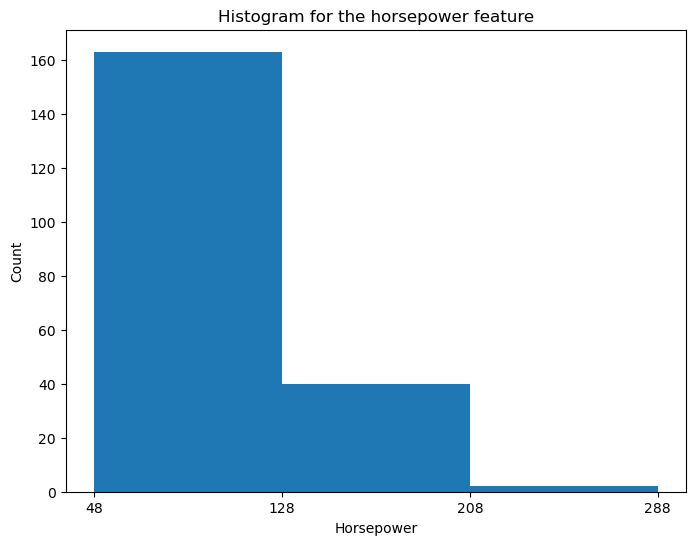

In [173]:
#####
plt.subplots(figsize=(8,6))  ##Definiendo el pedazo de pantalla que quiero para hacer la gráfica
plt.hist(dcars['horsepower'], bins) #La propia gráfica
plt.title('Histogram for the horsepower feature') # add a title to the histogram
plt.ylabel('Count') # add y-label
plt.xlabel('Horsepower') # add x-label
plt.ticklabel_format(style='plain') #plain sirve para que en los ejes no coloque notaciones cientificas o algo así, sino el propio número que es.
plt.xticks(bins)  ## sirve para que en el eje x me muestre las etiquetas de acuerdo con el contenedor bins definido
plt.show()

In [118]:
### Comprobando mediante filtro lo que vemos visualmente, es decir, que en el rango de 128 a 208 HP hay 40 registros.
a=dcars.loc[(dcars['horsepower']>128) & (dcars['horsepower']<=208)]
a.shape[0]

40

##### Podemos finalmente categorizar los grupos si se quiere. Clasificar el nivel de hp en alto, medio y bajo.

In [174]:
group = ['Bajo', 'Medio', 'Alto']

In [175]:
dcars['horsepower-group'] = pd.cut(dcars['horsepower'], bins, labels=group, include_lowest=True )

In [176]:
dcars[['horsepower','horsepower-group']].head()

,horsepower,horsepower-group
0,111.0,Bajo
1,111.0,Bajo
2,154.0,Medio
3,102.0,Bajo
4,115.0,Bajo


Text(0.5, 1.0, 'Horsepower group')

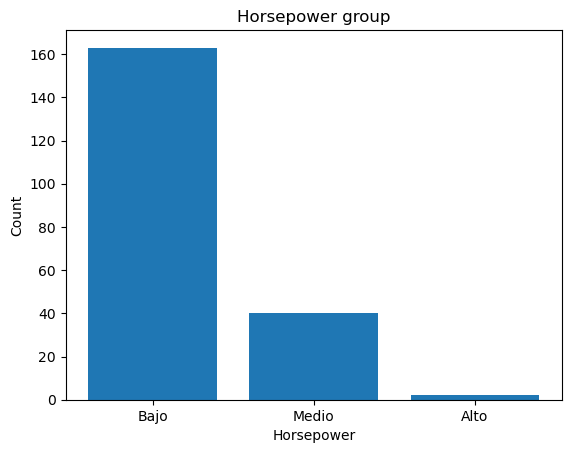

In [177]:
plt.bar(group, dcars["horsepower-group"].value_counts()) 
plt.xlabel("Horsepower")
plt.ylabel("Count")
plt.title("Horsepower group")

#### Y hasta acá va este tema.

## Author
<a href="https://www.linkedin.com/in/iv%C3%A1n-pinilla-%C3%A1vila-21bb45121/" target="_blank"><font size = 4>Iván P. </a>
